In [8]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.stats as stats
import sys
import os
from importlib import reload
from tqdm import tqdm
import pickle5 as pickle
cwd=os.getcwd()

# Import code
sys.path.insert(0, './../../DataAndScripts/structured_scripts/')

import functions_optimal as funopt
import functions as fun
import data_analysis as da
import sims_utils as su
import validate_utils as vu
import plot_functions as pl
# import ricciardi_class as ric
import network as network
reload(vu)
reload(pl)

path2sims='./simulation_output/'

/Users/agos/Dropbox/ColumbiaProjects/Code_Reshuffling_Github/2-SuppFigures/Supp_Figure_4_agos


In [2]:
import matplotlib as mpl

area=4.0;linethicknes=1.0;

font = {'family' : 'normal','weight' : 'normal','size'   : 10, 'family':'serif','serif':['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] =linethicknes
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42

In [3]:
chaos_data = {
    'A': np.array([
        [False,False,False,False,False,False,False,True ,True ,True ],
        [False,False,False,False,False,False,False,False,False,False],
        [True ,True ,True ,True ,True ,True ,True ,True ,True ,False],
        [False,False,False,False,False,True ,True ,True ,True ,False]
    ]),
    'B': np.array([
        [False,False,False,False,False,False,False,True ,True ,False],
        [False,False,False,False,False,False,False,True ,True ,True ],
        [False,False,False,False,True ,False,False,False,True ,True ],
        [False,False,False,False,True ,False,False,False,False,False]
    ]),
    'C': np.array([
        [False,False,True ,True ,True ,True ,True ,True ],
        [True ,False,False,False,False,False,False,False],
        [True ,True ,True ,False,False,False,False,False],
        [True ,True ,True ,True ,False,False,False,False]
    ]),
    'D': np.array([
        [False,False,False,False,False,False,False,False,False,True ],
        [False,False,False,False,False,False,False,False,False,False],
        [True ,True ,True ,True ,True ,True ,True ,True ,True ,False],
        [True ,True ,True ,True ,True ,True ,True ,True ,False,False]
    ]),
    'E': np.array([
        [True ,True ,False,False,False,False,False],
        [True ,True ,True ,True ,True ,False,False],
        [True ,True ,True ,True ,True ,True ,False],
        [True ,True ,True ,True ,True ,True ,True ]
    ]),
}

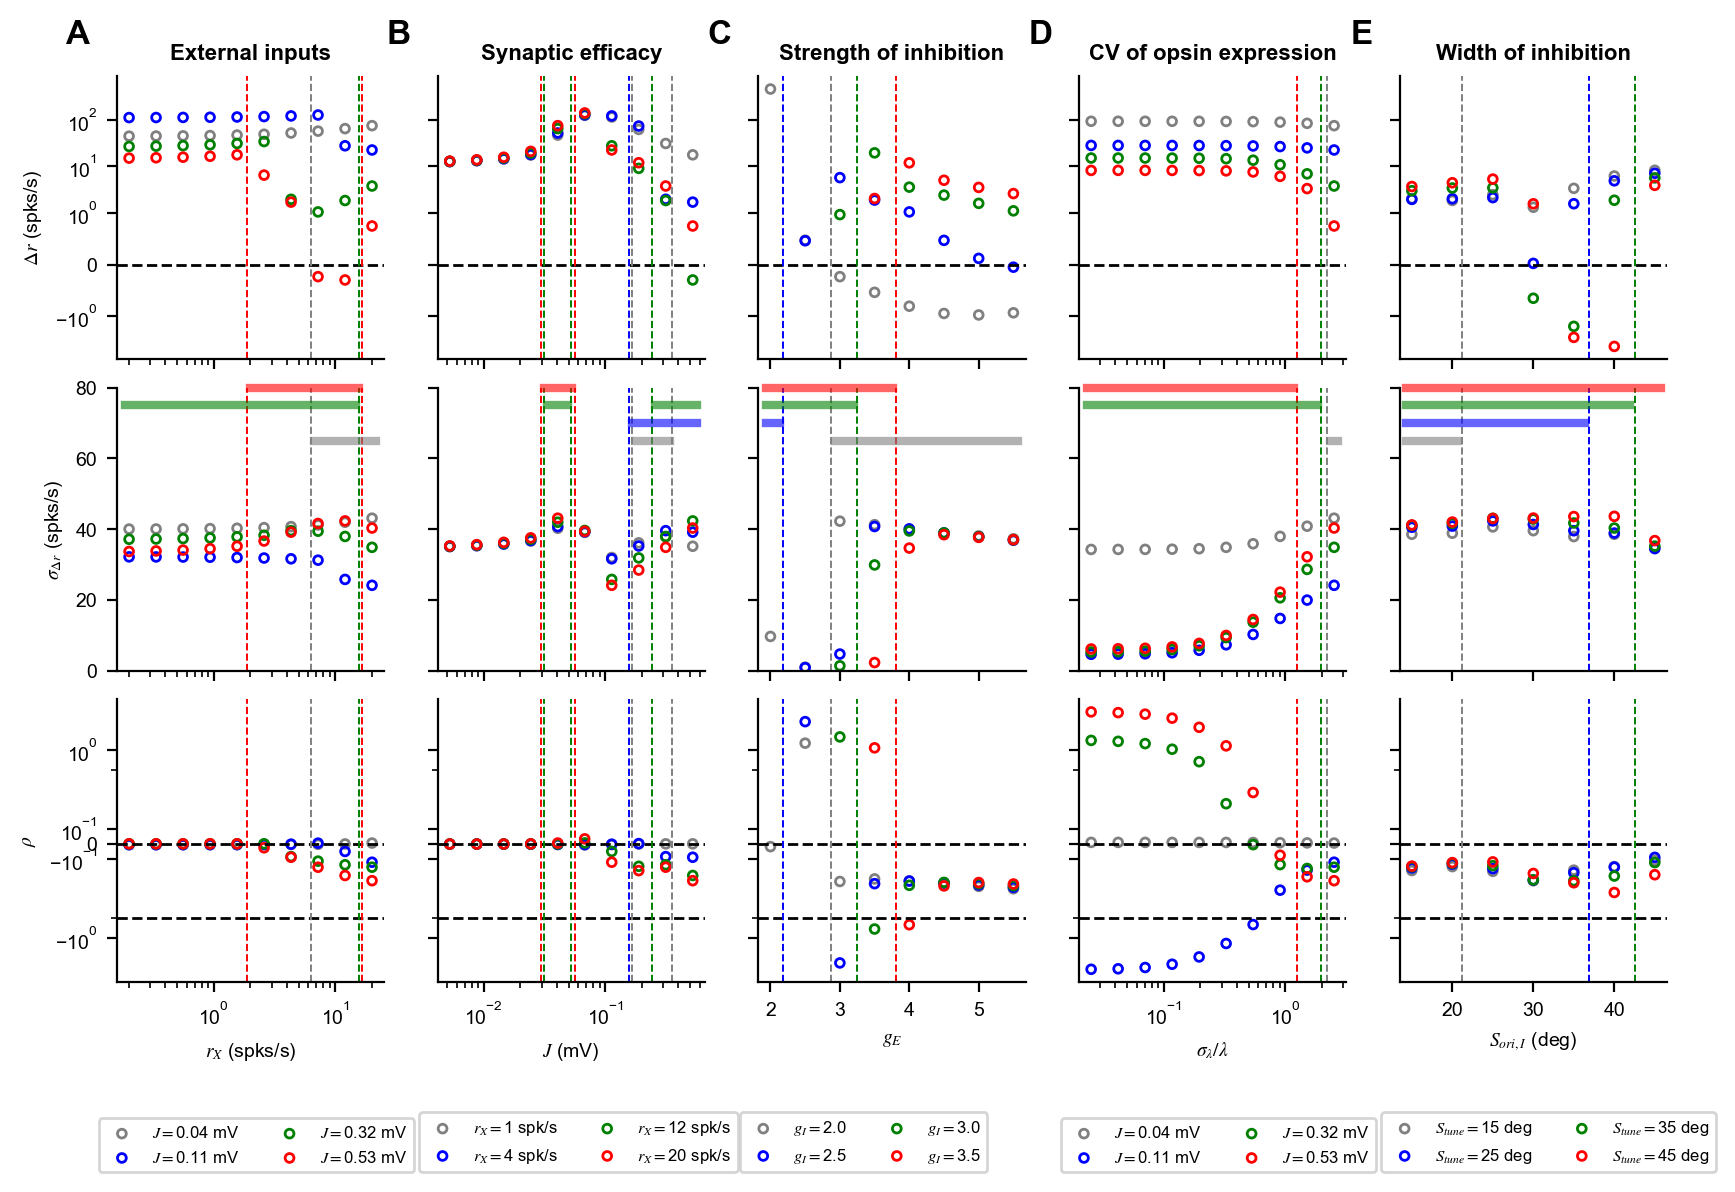

In [10]:
import matplotlib.pyplot as plt
import numpy as np
# plt.rcParams.update({'font.size': 16})

rows = 3
cols = 5
# Create a 3x3 grid of subplots with shared x and y axis
fig, axs = plt.subplots(rows, cols, figsize=(2*cols,2*(rows)), dpi=200, sharex='col',sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': 0.2})


# Plot each subplot with three curves in dark red, dark blue, and dark green

# fig.suptitle('Structured Model',fontsize=15)

# scan_data['predAs'] has dims J, rX, preds

axs[0,0].text(-.1, 1.2,'A', transform=axs[0,0].transAxes,fontsize=12, fontweight='bold', va='top', ha='right');
axs[0,1].text(-.1, 1.2,'B', transform=axs[0,1].transAxes,fontsize=12, fontweight='bold', va='top', ha='right');
axs[0,2].text(-.1, 1.2,'C', transform=axs[0,2].transAxes,fontsize=12, fontweight='bold', va='top', ha='right');
axs[0,3].text(-.1, 1.2,'D', transform=axs[0,3].transAxes,fontsize=12, fontweight='bold', va='top', ha='right');
axs[0,4].text(-.1, 1.2,'E', transform=axs[0,4].transAxes,fontsize=12, fontweight='bold', va='top', ha='right');


axs[0,0].set_ylabel(r'$\Delta r$ (spks/s)')#,fontsize=15)
axs[1,0].set_ylabel(r'$\sigma_{\Delta r}$ (spks/s)')#,fontsize=15)
axs[2,0].set_ylabel(r'$\rho$')#,fontsize=15)

axs[0,0].set_xscale('log')
axs[0,1].set_xscale('log')
axs[0,3].set_xscale('log')

axs[0,0].set_yscale('symlog',linthresh=1)
axs[1,0].set_ylim(0,80)
axs[2,0].set_yscale('symlog',linthresh=0.5)


###############################
###############################
axs[0,0].set_title(f'External inputs',fontsize=8,fontweight='bold')
axs[0,1].set_title(f'Synaptic efficacy',fontsize=8,fontweight='bold')
axs[0,2].set_title(f'Strength of inhibition',fontsize=8,fontweight='bold')
axs[0,3].set_title(f'CV of opsin expression',fontsize=8,fontweight='bold')
axs[0,4].set_title(f'Width of inhibition',fontsize=8,fontweight='bold')

color=['grey','b','g','r']

for colidx in range(cols):
    
    # associate each column with a panel
    panel = ['A','B','C','D','E'][colidx]

    # load pickled dict corresponding to panel, extract items
    with open(path2sims+'/Scan_Figure_'+panel+'.pkl', 'rb') as handle:
        scan_data = pickle.load(handle)
    x_data = scan_data['x_data']*[1,10**3,1,1,1][colidx]
    l_data = scan_data['line_data']*[10**3,1,1,10**3,1][colidx]
    l_label = [r'$J=$%.2f mV',r'$r_X=$%d spk/s',r'$g_I=$%.1f',
               r'$J=$%.2f mV',r'$S_{tune}=$%d deg'][colidx]
    preds = scan_data['preds']
    chaos = chaos_data[panel]
    # for each row, plot the correct value
    for rowidx in range(rows):
        if rowidx == 0:
            y_data = preds[:,:,1]-preds[:,:,0]
            axs[rowidx,colidx].axhline(0,c='k',ls='--')
        elif rowidx == 1:
            y_data = preds[:,:,-2]
        elif rowidx == 2:
            y_data = preds[:,:,-1]
            axs[rowidx,colidx].axhline(0,c='k',ls='--')
            axs[rowidx,colidx].axhline(-0.5,c='k',ls='--')
        for lineidx in range(4):
            axs[rowidx,colidx].scatter(x=x_data,y=y_data[lineidx],facecolors='none',edgecolors=color[lineidx], 
                                          s=10, marker='o', #mfc='white',
                                          zorder=1,label=l_label%(l_data[lineidx]))

        if rowidx == 2:
            axs[rowidx,colidx].legend(prop={'size': 6},ncol=2,
                                          loc='lower left',bbox_to_anchor=(-0.1, -0.7),)

        axs[rowidx,colidx].spines['top'].set_visible(False)
        axs[rowidx,colidx].spines['right'].set_visible(False)

    for lineidx in range(4):
        # calculate where to put horizontal bars and vertical lines by adding padding to x_data
        # first, we calculate dx (in either linear or log scale)
        # horizontal bars end up bigger than we want, so we need to pad them a smaller amount
        #     than we pad the vertical line positions (sml_dx vs big_dx)
        # we also add additional padding for each curve so that their vertical lines
        #     don't overlap (tny_dx)
        if colidx in [0,1,3]:
            dx = (np.log10(x_data[1])-np.log10(x_data[0]))
            tny_dx = [0,1,2,3][lineidx]*dx/8
            sml_dx = dx/7
            big_dx = dx/4
            xm_sml_dx = np.fmax(x_data[0]  / 10**sml_dx,x_data / 10**sml_dx / 10**tny_dx)
            xp_sml_dx = np.fmin(x_data[-1] * 10**sml_dx,x_data * 10**sml_dx * 10**tny_dx)
            xm_big_dx = np.fmax(x_data[0]  / 10**sml_dx,x_data / 10**big_dx / 10**tny_dx)
            xp_big_dx = np.fmin(x_data[-1] * 10**sml_dx,x_data * 10**big_dx * 10**tny_dx)
        else:
            dx = (x_data[1]-x_data[0])
            tny_dx = [0,1,2,3][lineidx]*dx/8
            sml_dx = dx/7
            big_dx = dx/4
            xm_sml_dx = np.fmax(x_data[0]  - sml_dx,x_data - sml_dx - tny_dx)
            xp_sml_dx = np.fmin(x_data[-1] + sml_dx,x_data + sml_dx + tny_dx)
            xm_big_dx = np.fmax(x_data[0]  - sml_dx,x_data - big_dx - tny_dx)
            xp_big_dx = np.fmin(x_data[-1] + sml_dx,x_data + big_dx + tny_dx)
        if np.count_nonzero(chaos[lineidx]) > 0:
            # iterate over chaos array to isolate sub-blocks of chaos
            idx1 = 0
            idx2 = 0
            idx = 0
            in_block = False
            this_chaos = np.concatenate((chaos[lineidx],[False]))
            while idx < len(x_data)+1:
                # identify start of chaotic sub-block
                if not in_block and this_chaos[idx]:
                    in_block = True
                    idx1 = idx
                # identify end of chaotic sub-block, and plot horizontal bar + vertical lines
                if in_block and not this_chaos[idx]:
                    idx2 = idx - 1

                    sml_xmin=xm_sml_dx[idx1]
                    sml_xmax=xp_sml_dx[idx2]
                    big_xmin=xm_big_dx[idx1]
                    big_xmax=xp_big_dx[idx2]
                    for rowidx in range(rows):
                        if idx2==len(x_data)-1:
                            if idx1==0:
                                pass
                            else:
                                axs[rowidx,colidx].axvline(big_xmin,color=color[lineidx],ls='--',lw=0.7)
                        elif idx1==0:
                            axs[rowidx,colidx].axvline(big_xmax,color=color[lineidx],ls='--',lw=0.7)
                        else:
                            axs[rowidx,colidx].axvline(big_xmin,color=color[lineidx],ls='--',lw=0.7)
                            axs[rowidx,colidx].axvline(big_xmax,color=color[lineidx],ls='--',lw=0.7)
                    x,y = np.array([[sml_xmin, sml_xmax], [65+5*lineidx,65+5*lineidx]])
                    line = mpl.lines.Line2D(x, y, lw=3.,ls='-',color=color[lineidx],
                                            alpha=0.6,clip_on=False, zorder=100)

                    axs[1,colidx].add_line(line)

                    in_block = False
                idx += 1

axs[-1,0].set_xlabel(r'$r_{X}$ (spks/s)')#,fontsize=15)
axs[-1,1].set_xlabel(r'$J$ (mV)')#,fontsize=15)
axs[-1,2].set_xlabel(r'$g_E$')#,fontsize=15)
axs[-1,3].set_xlabel(r'$\sigma_{\lambda}/\lambda$')#,fontsize=15)
axs[-1,4].set_xlabel(r'$S_{ori,I}$ (deg)')#,fontsize=15)

axs[2,0].set_yticks([-1,-0.5,0,0.5,1],[-1,-0.5,0,0.5,1])

# fig.align_labels()
# fig.tight_layout()
# fig.savefig(path2sims+'/Figure_S2_new.pdf', bbox_inches='tight')
